![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

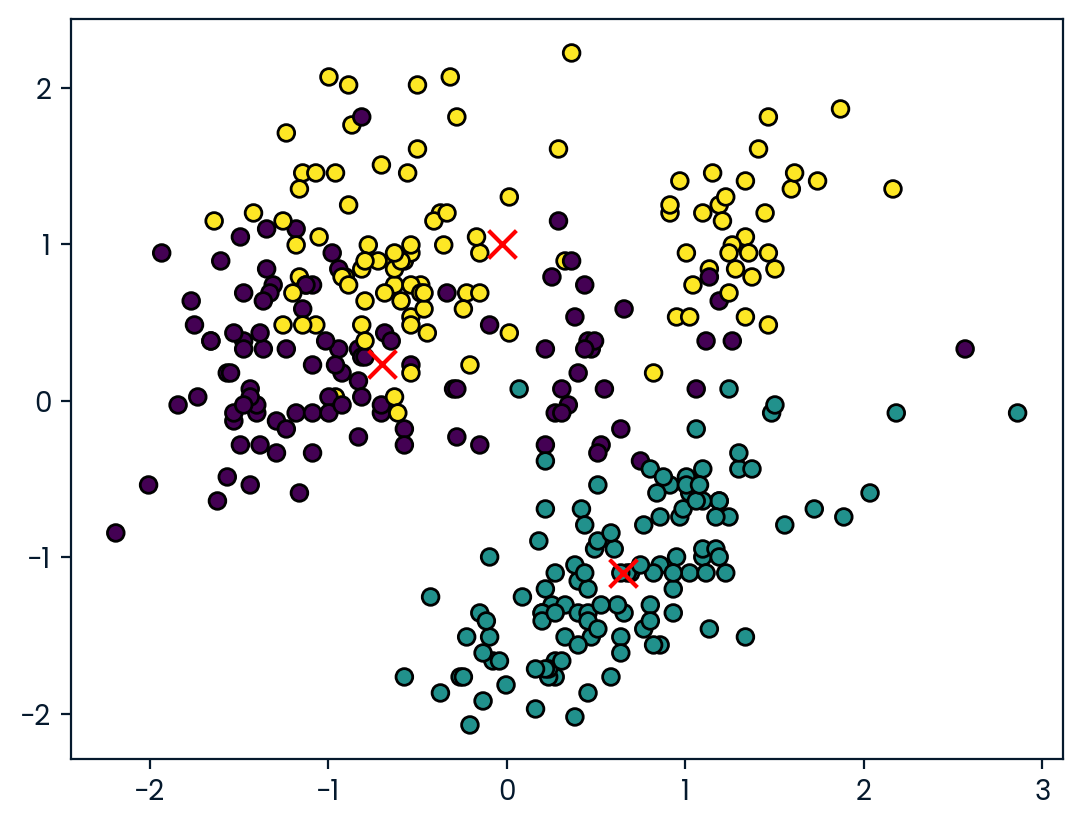

       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
label                                                                   
0             40.217757        17.611215         189.046729  3419.158879
1             47.568067        14.996639         217.235294  5092.436975
2             43.878302        19.111321         194.764151  4006.603774


In [36]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")


# Create music_dummies
cleaned_dummies = pd.get_dummies(penguins_df, drop_first=True)
# # Print the new DataFrame's shape
#print("Shape of music_dummies: {}".format(cleaned_dummies.shape))

#standardScaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cleaned_dummies)
scaled_data
#elbow analysis 

ks = range(1, 6)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(scaled_data)
    inertias.append(model.inertia_)
# Plot ks vs inertias
# plt.plot(ks, inertias, '-o')
# plt.xlabel('number of clusters, k')
# plt.ylabel('inertia')
# plt.xticks(ks)
# plt.show()
#the e;bow point is 3

model = KMeans(n_clusters=3)
res = model.fit(scaled_data)
labels = model.labels_
centroids = model.cluster_centers_
# Plotting
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels, cmap='viridis', edgecolor='k')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100)
plt.show()

numeric_columns = penguins_df.select_dtypes(include='number').columns.tolist()
penguins_df['label'] = model.labels_
stat_penguins = penguins_df.groupby('label')[numeric_columns].mean()
# Display the result
print(stat_penguins)